In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

14th of April - 17:20 

Gathered 60 seconds of data, 
Individual finger movements, grouped finger movements (pairs) and all finger closing (grasping).

In [2]:
data = pd.read_csv("../data/dataset-full_hand-60s.csv")

In [3]:
data.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Palm_x,Palm_y,...,Pinky_MCP_z,Pinky_PIP_x,Pinky_PIP_y,Pinky_PIP_z,Pinky_DIP_x,Pinky_DIP_y,Pinky_DIP_z,Pinky_TIP_x,Pinky_TIP_y,Pinky_TIP_z
0,38,269,111,47,101,35,22,23,-13.892977,-24.676735,...,127.042839,113.481201,131.047806,137.758286,128.349930,116.208405,119.820808,124.822617,118.878288,108.890717
1,39,356,120,62,146,39,24,25,-13.852209,-24.586508,...,127.192207,113.670609,131.218033,137.775970,128.412369,116.329781,120.034424,124.847496,118.893349,108.933693
2,35,434,128,72,185,37,25,25,-13.813737,-24.502161,...,127.295685,113.810234,131.367523,137.758301,128.447525,116.435005,120.223473,124.852211,118.890427,108.961174
3,32,476,137,74,205,39,24,27,-13.736932,-24.342701,...,127.465889,114.056679,131.638794,137.674881,128.473282,116.613785,120.565979,124.868614,118.919731,109.070923
4,33,490,140,79,217,38,25,27,-13.693318,-24.266806,...,127.565887,114.191597,131.785568,137.642868,128.489487,116.704178,120.750320,124.913513,118.978653,109.172569


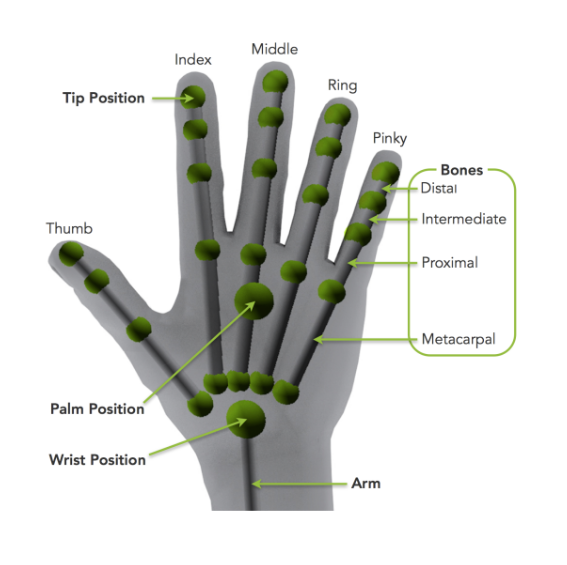

```
0 = JOINT_MCP – The metacarpophalangeal joint, or knuckle, of the finger.
1 = JOINT_PIP – The proximal interphalangeal joint of the finger.This is the middle joint of a finger.
2 = JOINT_DIP – The distal interphalangeal joint of the finger. This joint is closest to the tip.
3 = JOINT_TIP – The tip of the finger.
```

<AxesSubplot:>

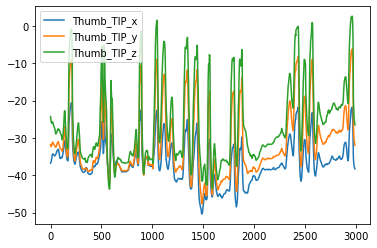

In [5]:
# Just considering the thumb
cols = ['Thumb_TIP_x', 'Thumb_TIP_y', 'Thumb_TIP_z']
df = data[cols]
df.plot()

In [6]:
leap_bone_columns = [
    "Palm_x", "Palm_y", "Palm_z",
    "Wrist_x", "Wrist_y", "Wrist_z",
    'Thumb_MCP_x', 'Thumb_MCP_y', 'Thumb_MCP_z',
    'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
    'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z',
    'Thumb_TIP_x', 'Thumb_TIP_y', 'Thumb_TIP_z',
    'Index_MCP_x', 'Index_MCP_y', 'Index_MCP_z',
    'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
    'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z',
    'Index_TIP_x', 'Index_TIP_y', 'Index_TIP_z',
    'Middle_MCP_x', 'Middle_MCP_y', 'Middle_MCP_z',
    'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
    'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z',
    'Middle_TIP_x', 'Middle_TIP_y', 'Middle_TIP_z',
    'Ring_MCP_x', 'Ring_MCP_y', 'Ring_MCP_z',
    'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z',
    'Ring_DIP_x', 'Ring_DIP_y', 'Ring_DIP_z',
    'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
    'Pinky_MCP_x', 'Pinky_MCP_y', 'Pinky_MCP_z',
    'Pinky_PIP_x', 'Pinky_PIP_y', 'Pinky_PIP_z',
    'Pinky_DIP_x', 'Pinky_DIP_y', 'Pinky_DIP_z',
    'Pinky_TIP_x', 'Pinky_TIP_y', 'Pinky_TIP_z'
    ]
len(leap_bone_columns)

66

In [7]:
66 - 3

63

In [8]:
data.shape

(2990, 74)

## Plotting an example point. 

In [9]:
data.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Palm_x', 'Palm_y', 'Palm_z',
       'Wrist_x', 'Wrist_y', 'Wrist_z', 'Thumb_MCP_x', 'Thumb_MCP_y',
       'Thumb_MCP_z', 'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
       'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z', 'Thumb_TIP_x',
       'Thumb_TIP_y', 'Thumb_TIP_z', 'Index_MCP_x', 'Index_MCP_y',
       'Index_MCP_z', 'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
       'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z', 'Index_TIP_x',
       'Index_TIP_y', 'Index_TIP_z', 'Middle_MCP_x', 'Middle_MCP_y',
       'Middle_MCP_z', 'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
       'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z', 'Middle_TIP_x',
       'Middle_TIP_y', 'Middle_TIP_z', 'Ring_MCP_x', 'Ring_MCP_y',
       'Ring_MCP_z', 'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z', 'Ring_DIP_x',
       'Ring_DIP_y', 'Ring_DIP_z', 'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
       'Pinky_M

In [10]:
channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']
bone_df = data.drop(channel_cols, 1)

examp_frame = bone_df.iloc[10].values

# Five finger, 4 joints + palm, wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3
examp_frame = examp_frame.reshape((3, NUM_POINTS//3))

### Plotting points of the hand

<IPython.core.display.Javascript object>


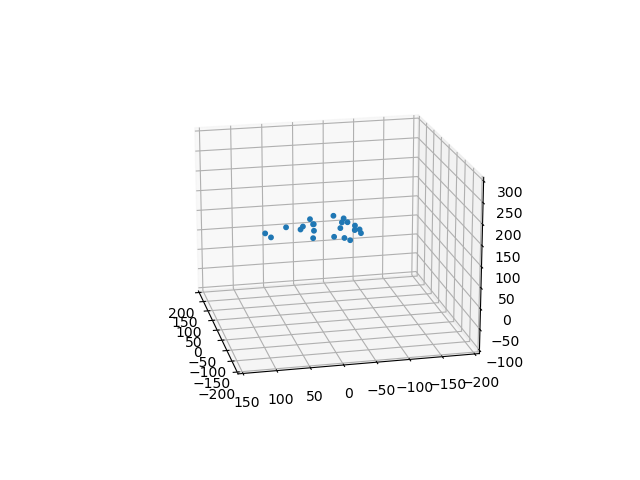

In [11]:
%matplotlib notebook

def plot_points(points, scatter):
    scatter.set_offsets(points[:2].T)
    scatter.set_3d_properties(points[2], zdir='z')
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
sizes = [10]*(NUM_POINTS//3)
sizes[0] = 30
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)

## Plotting the whole hand

In [12]:
# Plotting the whole hand
def plot_bone_lines(points, ax):
    '''
    Plot the lines for the hand based on a full hand model.
    (22 points, 66 vars)
    '''
    mcps = []

    # Wrist
    wrist = points[:,1]

    # For Each of the 5 fingers
    for i in range(0,5):
        n = 4*i + 2

        # Get each of the bones
        mcp = points[:,n+0]
        pip = points[:,n+1]
        dip = points[:,n+2]
        tip = points[:,n+3]

        # Connect the lowest joint to the middle joint
        bot = plt3d.art3d.Line3D([mcp[0], pip[0]], [mcp[1], pip[1]], [mcp[2], pip[2]])
        ax.add_line(bot)

        # Connect the middle joint to the top joint
        mid = plt3d.art3d.Line3D([pip[0], dip[0]], [pip[1], dip[1]], [pip[2], dip[2]])
        ax.add_line(mid)

        # Connect the top joint to the tip of the finger
        top = plt3d.art3d.Line3D([dip[0], tip[0]], [dip[1], tip[1]], [dip[2], tip[2]])
        ax.add_line(top)

        # Connect each of the fingers together
        mcps.append(mcp)
    for mcp in range(0,4):
        line = plt3d.art3d.Line3D([mcps[mcp][0], mcps[mcp+1][0]],
                                  [mcps[mcp][1], mcps[mcp+1][1]],
                                  [mcps[mcp][2], mcps[mcp+1][2]])
        ax.add_line(line)
    # Create the right side of the hand joining the pinkie mcp to the "wrist"
    line = plt3d.art3d.Line3D([wrist[0], mcps[4][0]],
                                  [wrist[1], mcps[3+1][1]],
                                  [wrist[2], mcps[3+1][2]])
    ax.add_line(line)

    # Generate the "Wrist", note right side is not right.
    line = plt3d.art3d.Line3D([wrist[0], mcps[0][0]],
                                  [wrist[1], mcps[0][1]],
                                  [wrist[2], mcps[0][2]])
    ax.add_line(line)

    # Connext the left hand side of the index finger to the thumb.
    thumb_mcp = points[:,1+2]
    pinky_mcp = points[:,4+2]
    line = plt3d.art3d.Line3D([thumb_mcp[0], pinky_mcp[0]],
                                  [thumb_mcp[1], pinky_mcp[1]],
                                  [thumb_mcp[2], pinky_mcp[2]])
    ax.add_line(line)

<IPython.core.display.Javascript object>


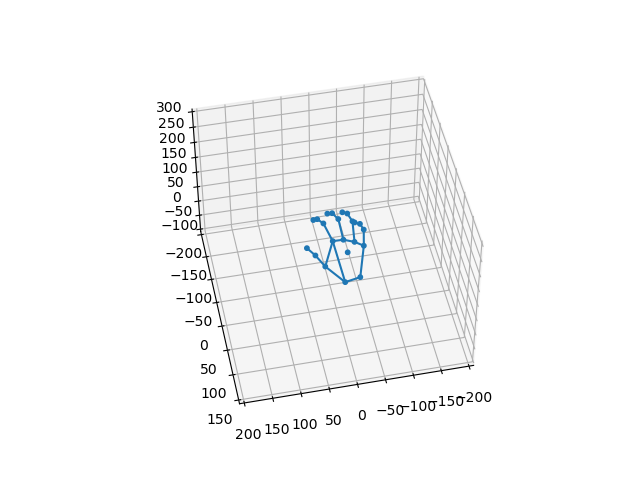

In [13]:
import mpl_toolkits.mplot3d as plt3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
sizes = [10]*(NUM_POINTS//3)
sizes[0] = 30
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)
plot_bone_lines(examp_frame,ax)

<IPython.core.display.Javascript object>


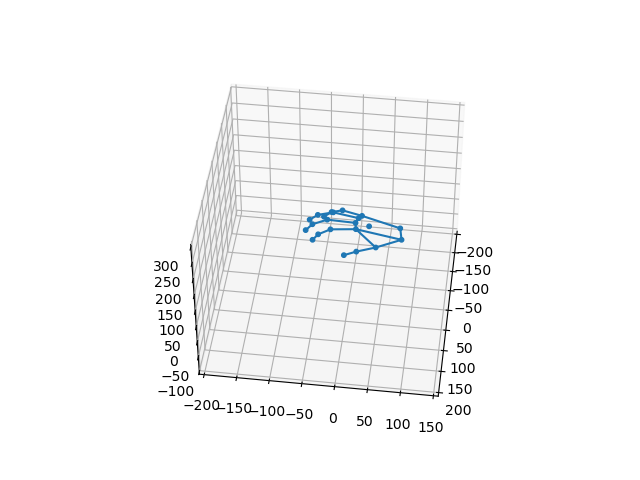

In [14]:
def plot_row_bones(row):
    channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']
    bone_df = row.drop(channel_cols)

    # Five finger, 4 joints + palm, wrist. x,y,z
    NUM_POINTS = (5 * 4 + 2) * 3
    examp_frame = bone_df.values.reshape((3, NUM_POINTS//3))
    
    # Plot setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
    ax.view_init(elev=45., azim=122)

    points_ = np.zeros((3, NUM_POINTS))
    sizes = [10]*(NUM_POINTS//3)
    sizes[0] = 30
    patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

    # Plot the hand
    plot_points(examp_frame, patches)
    plot_bone_lines(examp_frame,ax)
    
plot_row_bones(data.iloc[15])

# Getting the thumb angles

<IPython.core.display.Javascript object>


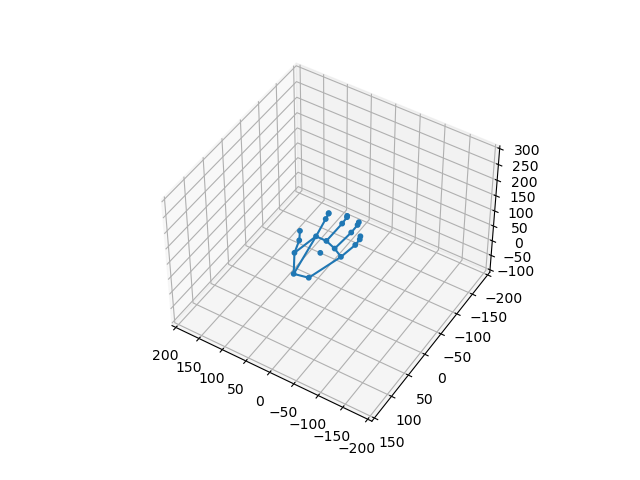

[  8.87506294  10.97589016 143.81967163] [ 16.50951195 -27.11204529 146.0940094 ] [ 23.54475403 -45.1553421  135.88659668] [ 28.95627022 -53.18553162 123.81588745]


In [19]:
def thumb_angles(row):
    channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']
    bone_df = row.drop(channel_cols)

    # Five finger, 4 joints + palm, wrist. x,y,z
    NUM_POINTS = (5 * 4 + 2) * 3
    examp_frame = bone_df.values.reshape((3, NUM_POINTS//3))
    
    # Plot setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
    ax.view_init(elev=45., azim=122)

    points_ = np.zeros((3, NUM_POINTS))
    sizes = [10]*(NUM_POINTS//3)
    sizes[0] = 30
    patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

    # Plot the hand
    plot_points(examp_frame, patches)
    plot_bone_lines(examp_frame,ax)
    
    # Getting the thumb angles
    thumb_points = []
    # Wrist
    wrist = examp_frame[:,1]

    # For Each of the 5 fingers
    for i in range(0,5):
        n = 4*i + 2

        # Get each of the bones
        mcp = examp_frame[:,n+0]
        pip = examp_frame[:,n+1]
        dip = examp_frame[:,n+2]
        tip = examp_frame[:,n+3]
        
        if (i == 1):
            # This is the data for the thumb
            
    
    
thumb_angles(data.iloc[15])

In [21]:
examp_row = data.iloc[15]

channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']
examp_df = examp_row.drop(channel_cols)

# Five finger, 4 joints + palm, wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3
examp_frame = examp_df.values.reshape((3, NUM_POINTS//3))

examp_frame

array([[-12.97586632, -23.47154045,   3.92577815,  29.67614746,
         40.7643013 ,  52.32985687,   8.87506294,  16.50951195,
         23.54475403,  28.95627022, -10.50470352, -11.60757256,
         -5.83520651,   0.5820083 , -29.39881325, -34.93033218,
        -31.45650673, -25.67861557, -44.8888855 , -52.05702591,
        -49.56204605, -43.10003281],
       [ 29.2093811 ,  76.28362274,  80.63735199,  43.49666595,
         14.97313023,  -2.7901299 ,  10.97589016, -27.11204529,
        -45.1553421 , -53.18553162,   8.552145  , -35.07025146,
        -57.41009903, -67.08376312,  11.43435001, -28.36207199,
        -51.93082428, -63.97810364,  15.23443222, -15.78940392,
        -32.53930283, -43.71127319],
       [128.95880127, 117.60407257, 116.04956055, 117.3033905 ,
        113.16712952, 113.32656097, 143.81967163, 146.0940094 ,
        135.88659668, 123.81588745, 139.31486511, 140.63298035,
        129.1893158 , 116.74213409, 131.52632141, 136.34866333,
        128.47640991, 118.0912

In [30]:
# Getting the thumb angles
thumb_points = []
# Wrist
wrist = examp_frame[:,1]

# For Each of the 5 fingers
for i in range(0,5):
    n = 4*i + 2

    # Get each of the bones
    mcp = examp_frame[:,n+0]
    pip = examp_frame[:,n+1]
    dip = examp_frame[:,n+2]
    tip = examp_frame[:,n+3]

    if (i == 1):
        # This is the data for the thumb
        thumb_points = [wrist, mcp, pip, dip, tip]

In [32]:
wri, mcp, pip, dip, tip = thumb_points
thumb_points = np.array(thumb_points)

In [35]:
pip, dip, tip

(array([ 16.50951195, -27.11204529, 146.0940094 ]),
 array([ 23.54475403, -45.1553421 , 135.88659668]),
 array([ 28.95627022, -53.18553162, 123.81588745]))

In [43]:
# Calculate the angle between the vectors in 
a = pip - dip
b = dip - tip

ab = a.dot(b)
la = np.linalg.norm(a)
lb = np.linalg.norm(b)
x = ab / (lb * la)
x, np.arccos(x)

(0.9037777172935737, 0.4422810587760879)

In [46]:
def dot_product_angle(v1,v2):
    '''
    Get the angle between 2 vectors using the dot product
    '''
    if np.linalg.norm(v1) == 0 or np.linalg.norm(v2) == 0:
        # Avoiding a zero division error
        print("Zero magnitude vector!")
    else:
        vector_dot_product = np.dot(v1,v2)
        # Get angle in radians
        arccos = np.arccos(vector_dot_product / (np.linalg.norm(v1) * np.linalg.norm(v2)))
        # Convert to degrees
        angle = np.degrees(arccos)
        return angle
    return 0

dot_product_angle(a,b)

25.340838026447337

In [57]:
wri, mcp, pip, dip, tip = thumb_points

# Get vectors for each bone
metacarpal   = mcp - wri
proximital   = pip - mcp
intermediate = dip - pip 
distal       = tip - dip

m_p = dot_product_angle(metacarpal, proximital)
# Intermediate Proximital
p_i = dot_product_angle(proximital, intermediate)
# Distal Intermediate Angle
i_d = dot_product_angle(intermediate, distal)

print(m_p, p_i, i_d)

22.0161567349311 32.5896286756852 25.340838026447337


<IPython.core.display.Javascript object>


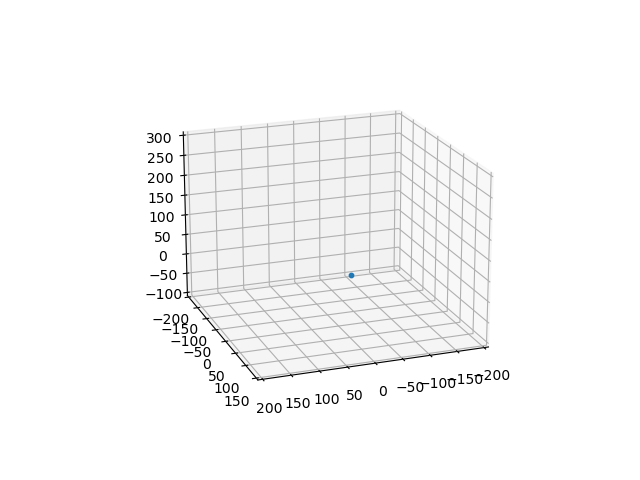

In [34]:
def plot_points(points, scatter):
    scatter.set_offsets(points[:2].T)
    scatter.set_3d_properties(points[2], zdir='z')
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
sizes = [10]*(NUM_POINTS//3)
sizes[0] = 30
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_row, patches)

# Making a relative hand model

### Feature extraction, making it relative

In [16]:
bone_cols_x = []
bone_cols_y = []
bone_cols_z = []


finger_names = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']
bone_names = ['MCP', 'PIP', 'DIP', 'TIP']
# We can of course generate column names on the fly:
for finger in finger_names:
    for bone in bone_names:
        bone_cols_x.append(f"{finger}_{bone}_x")
        bone_cols_y.append(f"{finger}_{bone}_y")
        bone_cols_z.append(f"{finger}_{bone}_z")

print(bone_cols_x)

['Thumb_MCP_x', 'Thumb_PIP_x', 'Thumb_DIP_x', 'Thumb_TIP_x', 'Index_MCP_x', 'Index_PIP_x', 'Index_DIP_x', 'Index_TIP_x', 'Middle_MCP_x', 'Middle_PIP_x', 'Middle_DIP_x', 'Middle_TIP_x', 'Ring_MCP_x', 'Ring_PIP_x', 'Ring_DIP_x', 'Ring_TIP_x', 'Pinky_MCP_x', 'Pinky_PIP_x', 'Pinky_DIP_x', 'Pinky_TIP_x']


In [17]:
# Making a relative model based on the wrist
relative_from = 'Palm'

df = data
df[bone_cols_x] = data[bone_cols_x].sub(data[relative_from+'_x'], axis=0)
df[bone_cols_y] = data[bone_cols_y].sub(data[relative_from+'_y'], axis=0)
df[bone_cols_z] = data[bone_cols_z].sub(data[relative_from+'_z'], axis=0)

[Text(0.5, 1.0, 'sEMG and Leap corrolations')]

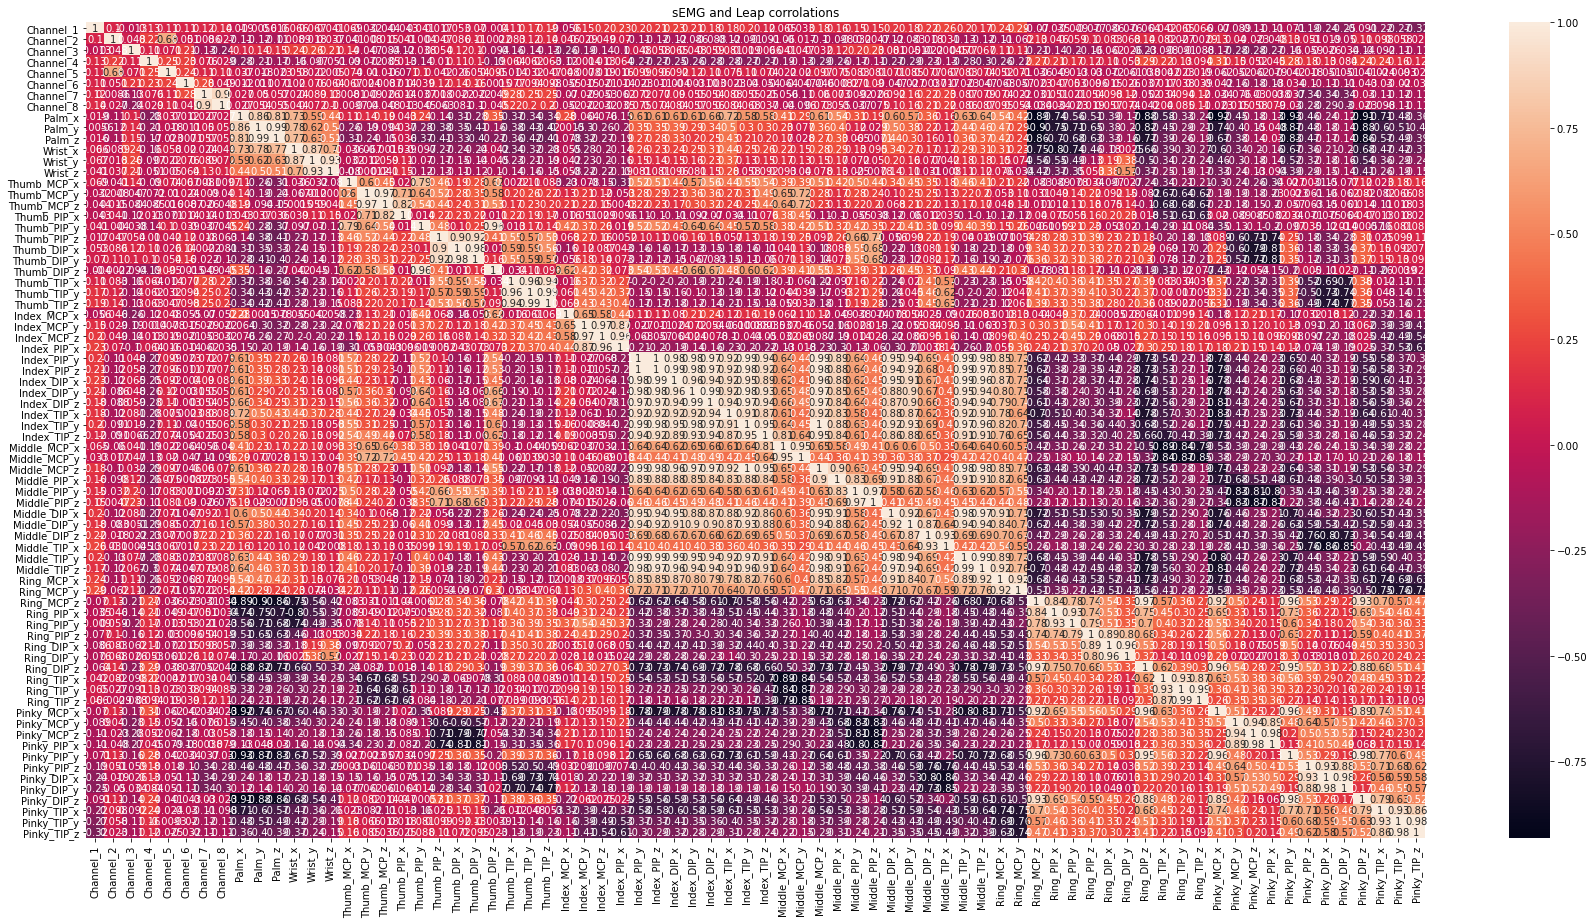

In [18]:
%matplotlib inline

plt.rc('figure', figsize=(30, 15))

sns.heatmap(df.corr(), annot=True).set(title="sEMG and Leap corrolations")

In [19]:
print("Correlation Matrix")
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))

Correlation Matrix

Top Absolute Correlations
Index_PIP_y   Index_PIP_z     0.996409
Index_TIP_y   Middle_MCP_z    0.995576
Index_DIP_y   Index_DIP_z     0.992956
Index_PIP_z   Index_DIP_x     0.992689
Index_PIP_y   Middle_MCP_z    0.991811
Thumb_TIP_y   Thumb_TIP_z     0.991594
Index_PIP_y   Index_TIP_y     0.990609
              Middle_TIP_y    0.988838
Palm_y        Palm_z          0.988365
Middle_TIP_y  Middle_TIP_z    0.988231
dtype: float64
